_**Case Ifood - Vitor Vieira -
Data Analyst**_

**Download dos dados para o repositorio no Databricks**

In [0]:
# Download do arquivo .JSON
url_orders_json = "https://data-architect-test-source.s3-sa-east-1.amazonaws.com/order.json.gz" 
local_path = "dbfs:/tmp/order.json.gz"
dbutils.fs.cp(url_orders_json, local_path)

Out[44]: True

In [0]:
## Download dos arquivos .CSV 

# Consumer
url_consumer_csv = "https://data-architect-test-source.s3-sa-east-1.amazonaws.com/consumer.csv.gz" 
local_path = "dbfs:/tmp/consumer.csv.gz"
dbutils.fs.cp(url_consumer_csv, local_path)

# Restaurant
url_restaurant_csv = "https://data-architect-test-source.s3-sa-east-1.amazonaws.com/restaurant.csv.gz" 
local_path = "dbfs:/tmp/restaurant_csv.gz"
dbutils.fs.cp(url_restaurant_csv, local_path)

Out[50]: True

In [0]:
## Download do arquivo .TAR 

# AB_test
url_ab_test_tar = "https://data-architect-test-source.s3-sa-east-1.amazonaws.com/ab_test_ref.tar.gz" 
local_path = "dbfs:/tmp/ab_test_ref.tar.gz"
dbutils.fs.cp(url_ab_test_tar, local_path)

# Listar conteúdo de um diretório no DBFS
files = dbutils.fs.ls("dbfs:/tmp/")
for file in files:
    print(file.name)

ab_test_ref.tar.gz
consumer.csv.gz
order.json.gz
restaurant_csv.gz


Extrair .TAR para .CSV

In [0]:
# Criar uma cópia do arquivo "dbfs:/" -> "/dbfs/" para poder usar shell e extrair o arquivo

dbutils.fs.cp("dbfs:/tmp/ab_test_ref.tar.gz", "file:/dbfs/tmp/ab_test_ref.tar.gz")

Out[133]: True

In [0]:
# Verificar se a cópia foi feita com sucesso
ls /dbfs/tmp/ 

ab_test_ref.tar.gz


In [0]:
%sh
# Criar o diretório de destino para extração
mkdir -p /dbfs/tmp/extracted/

# Extrair o arquivo .tar.gz para o diretório
tar -zxvf /dbfs/tmp/ab_test_ref.tar.gz -C /dbfs/tmp/extracted/

._ab_test_ref.csv
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
ab_test_ref.csv


In [0]:
# Verificar se o arquivo foi extraído com sucesso no diretorio

ls /dbfs/tmp/extracted/

ab_test_ref.csv


In [0]:
# Mover o arquivo extraido /dbfs/tmp/extracted/ab_test_ref.csv de volta "dbfs:/tmp/"

dbutils.fs.cp("file:/dbfs/tmp/extracted/ab_test_ref.csv", "dbfs:/tmp/ab_test_ref.csv")

Out[147]: True

In [0]:
# Listar conteúdo de um diretório no DBFS para checar se foi feita uma cópia do "ab_test_ref.csv"
files = dbutils.fs.ls("dbfs:/tmp/")
for file in files:
    print(file.name)

## dbutils.fs.rm("dbfs:/tmp/dados.tar", True)

ab_test_ref.csv
ab_test_ref.tar.gz
consumer.csv.gz
order.json.gz
restaurant_csv.gz


**Leitura dos dataframes**

In [0]:
# LEITURA DA BASE CONSUMIDOR --> DF_CONSUMER

path_consumer_csv = "dbfs:/tmp/consumer.csv.gz"
df_consumer = spark.read.csv(path_consumer_csv, header=True, inferSchema=True)
df_consumer.show(5)

+--------------------+--------+--------------------+------+-------------+-------------------+---------------------+
|         customer_id|language|          created_at|active|customer_name|customer_phone_area|customer_phone_number|
+--------------------+--------+--------------------+------+-------------+-------------------+---------------------+
|e8cc60860e09c0bb1...|   pt-br|2018-04-05 14:49:...|  true|         NUNO|                 46|            816135924|
|a2834a38a9876cf74...|   pt-br|2018-01-14 21:40:...|  true|     ADRIELLY|                 59|            231330577|
|41e1051728eba1334...|   pt-br|2018-01-07 03:47:...|  true|        PAULA|                 62|            347597883|
|8e7c1dcb64edf95c9...|   pt-br|2018-01-10 22:17:...|  true|       HELTON|                 13|            719366842|
|7823d4cf4150c5dae...|   pt-br|2018-04-06 00:16:...|  true|       WENDER|                 76|            543232158|
+--------------------+--------+--------------------+------+-------------

In [0]:
# LEITURA DA BASE RESTAURANTE --> DF_RESTAURANT

path_restaurant_csv = "dbfs:/tmp/restaurant_csv.gz"
df_restaurant = spark.read.csv(path_restaurant_csv, header=True, inferSchema=True)
df_restaurant.show(5)

+--------------------+--------------------+-------+-----------+--------------+------------+-------------+-------------------+-----------------+--------------+--------------+----------------+
|                  id|          created_at|enabled|price_range|average_ticket|takeout_time|delivery_time|minimum_order_value|merchant_zip_code| merchant_city|merchant_state|merchant_country|
+--------------------+--------------------+-------+-----------+--------------+------------+-------------+-------------------+-----------------+--------------+--------------+----------------+
|d19ff6fca6288939b...|2017-01-23 12:52:...|  false|          3|          60.0|           0|           50|               30.0|            14025|RIBEIRAO PRETO|            SP|              BR|
|631df0985fdbbaf27...|2017-01-20 13:14:...|   true|          3|          60.0|           0|            0|               30.0|            50180|     SAO PAULO|            SP|              BR|
|135c5c4ae4c1ec1fd...|2017-01-23 12:46:...|  

In [0]:
# LEITURA DA BASE AB_TEST --> DF_AB_TEST

path_ab_test_csv = "dbfs:/tmp/ab_test_ref.csv"
df_ab_test = spark.read.csv(path_ab_test_csv, header=True, inferSchema=True)
df_ab_test.show(5)

+--------------------+---------+
|         customer_id|is_target|
+--------------------+---------+
|755e1fa18f25caec5...|   target|
|b821aa8372b8e5b82...|  control|
|d425d6ee4c9d4e211...|  control|
|6a7089eea0a5dc294...|   target|
|dad6b7e222bab31c0...|  control|
+--------------------+---------+
only showing top 5 rows



In [0]:
df_orders = spark.read \
    .option("compression", "gzip") \
    .json("dbfs:/tmp/order.json.gz")

df_orders.show(5)
df_orders.printSchema()

+-----------+--------------------+-------------+---------------------+------------------------+-------------------------+----------------------------+-------------------------+--------------------------+----------------------+-------------------------+--------------------+--------------------+-----------------+------------------+-----------------+--------------------+--------------------+---------------+--------------------+------------------+---------------+
|        cpf|         customer_id|customer_name|delivery_address_city|delivery_address_country|delivery_address_district|delivery_address_external_id|delivery_address_latitude|delivery_address_longitude|delivery_address_state|delivery_address_zip_code|               items|         merchant_id|merchant_latitude|merchant_longitude|merchant_timezone|    order_created_at|            order_id|order_scheduled|order_scheduled_date|order_total_amount|origin_platform|
+-----------+--------------------+-------------+---------------------+--

## Explorando os dados para entender a estrutura e o conteúdo das bases fornecidas

In [0]:
from pyspark.sql.functions import *

**DF_CONSUMER**

In [0]:
#Total de 806.156 customers
df_consumer.select("customer_id").distinct().count()

Out[11]: 806156

In [0]:
# O total de 806.156 customers é igual ao número de customer_id distinct,
# indicando que não há duplicidade nessa coluna

df_consumer.select("customer_id").count()

Out[12]: 806156

In [0]:
# Verificar quantos consumidores estão ativos e porcentagem (%)

# Contar o total de linhas
total_count_customer = df_consumer.count()

# Contar a quantidade de "true"
customer_percentual_active = df_consumer.groupBy("active").count()

# Adicionar a coluna "percentage" e realizar a divisão pelo total de linhas
df_customer_percentual = customer_percentual_active.withColumn("percentage", (col("count") / total_count_customer) * 100)
df_customer_percentual.show()

+------+------+-------------------+
|active| count|         percentage|
+------+------+-------------------+
|  true|804561|   99.8021474751785|
| false|  1595|0.19785252482149857|
+------+------+-------------------+



**DF_AB_TEST**

In [0]:
# Verificar a quantidade de clientes distribuídos entre os grupos controle e teste (target) no experimento A/B.
# O número total de clientes é inferior (806.467) ao da tabela de clientes (806.156), o que indica que nem todos os clientes foram alocados nos grupos 

df_ab_test.groupBy("is_target").count().show()

+---------+------+
|is_target| count|
+---------+------+
|  control|360542|
|   target|445925|
+---------+------+



**DF_RESTAURANT**

In [0]:
# Verificar quantos restaurantes estão ativos e porcentagem (%)

# Contar o total de linhas
total_count_restaurant = df_restaurant.count()

# Contar a quantidade de "enable"
restaurant_percentual_enable = df_restaurant.groupBy("enabled").count()

# Adicionar a coluna "percentage" e realizar a divisão pelo total de linhas
df_rest_percentual = restaurant_percentual_enable.withColumn("percentage", (col("count") / total_count_restaurant) * 100)
df_rest_percentual.show()

+-------+-----+------------------+
|enabled|count|        percentage|
+-------+-----+------------------+
|   true| 4060|55.677454744925946|
|  false| 3232|44.322545255074054|
+-------+-----+------------------+



In [0]:
# Divisão de restaurantes por estados (UF) e ordenar de forma descrescente pela quantidade "count"

df_restaurant.groupBy("merchant_state").count().orderBy(col("count"), ascending=False).show()

+--------------+-----+
|merchant_state|count|
+--------------+-----+
|            SP| 3127|
|            RJ| 1170|
|            MG|  556|
|            DF|  372|
|            PR|  372|
|            RS|  251|
|            CE|  202|
|            BA|  190|
|            SC|  183|
|            PE|  179|
|            GO|  152|
|            ES|  115|
|            RN|   90|
|            PB|   85|
|            AM|   56|
|            PA|   50|
|            MS|   41|
|            SE|   30|
|            AL|   29|
|            MA|   20|
+--------------+-----+
only showing top 20 rows



**DF_ORDERS**

In [0]:
# Truncar a data para contabilizar a quantidade de dias da tabela fato "orders"

##df_orders_truncated = df_orders.withColumn("order_date", to_date("order_created_at"))
##df_orders_truncated.select("order_date").show(5)

df_orders_truncated = df_orders.withColumn("order_date",date_trunc("hour", "order_created_at"))
df_orders_truncated.select("order_date").show(5)

+-------------------+
|         order_date|
+-------------------+
|2019-01-17 22:00:00|
|2019-01-17 17:00:00|
|2019-01-17 22:00:00|
|2019-01-17 23:00:00|
|2019-01-17 23:00:00|
+-------------------+
only showing top 5 rows



In [0]:
# Identificar a data mínima e máxima presentes na tabela fato 'orders'

df_orders_truncated.select(
    min("order_date").alias("min_date"),
    max("order_date").alias("max_date")
).show()

+-------------------+-------------------+
|           min_date|           max_date|
+-------------------+-------------------+
|2018-12-03 00:00:00|2019-01-31 23:00:00|
+-------------------+-------------------+



In [0]:
# Extrair apenas a hora do pedido para contar o número de orders por hora e identificar os períodos com maior ociosidade na operação

df_orders_hour_only = df_orders_truncated.withColumn(
    "order_hour_only",
    date_format("order_created_at", "HH:00")
)

df_orders_hour_only.select("order_created_at", "order_hour_only").show(5, False)

+------------------------+---------------+
|order_created_at        |order_hour_only|
+------------------------+---------------+
|2019-01-17T22:50:06.000Z|22:00          |
|2019-01-17T17:51:26.000Z|17:00          |
|2019-01-17T22:53:47.000Z|22:00          |
|2019-01-17T23:56:53.000Z|23:00          |
|2019-01-17T23:40:53.000Z|23:00          |
+------------------------+---------------+
only showing top 5 rows



In [0]:
# Conta o número de pedidos por cliente
pedidos_por_cliente = df_orders_truncated.groupBy("customer_id") \
                                         .agg(countDistinct("order_id").alias("qtd_pedidos"))

# Filtra os clientes com 1 pedido ou menos
clientes_ate_um_pedido = pedidos_por_cliente.filter("qtd_pedidos <= 1")

# Conta quantos clientes atendem a esse critério
total_clientes = clientes_ate_um_pedido.count()

print(f"Total de clientes com 1 pedido ou menos: {total_clientes}")

Total de clientes com 1 pedido ou menos: 377832


## Inicio das transformações

df_consumer + Inner Join + df_ab_test

In [0]:
# Realizar um inner join entre df_consumer e df_ab_test para filtrar apenas os consumer_id que participaram do experimento A/B (inner join irá remover os 311 consumidores que não participaram do teste A/B)

df_joined_consumer_ab = df_consumer.join(
    df_ab_test,
    df_consumer.customer_id == df_ab_test.customer_id,
    how="inner"
).select(
    df_consumer.customer_id,
    df_consumer.active,
    df_ab_test.is_target
)

df_joined_consumer_ab.show(5)

+--------------------+------+---------+
|         customer_id|active|is_target|
+--------------------+------+---------+
|0001226e517517758...|  true|   target|
|00021cd56b6d6c980...|  true|   target|
|00021f6dc15d10418...|  true|   target|
|00022b8c0c7af061f...|  true|  control|
|00029b26fb2121119...|  true|   target|
+--------------------+------+---------+
only showing top 5 rows



df_joined_consumer_ab + Inner Join + df_orders

In [0]:
df_joined_orders_consumer_ab = df_orders.join(
    df_joined_consumer_ab,
    df_orders.customer_id == df_joined_consumer_ab.customer_id,
    how="inner"
).select(
    df_joined_consumer_ab.customer_id,
    df_joined_consumer_ab.active,
    df_joined_consumer_ab.is_target,
    df_orders.merchant_id,
    df_orders.order_id,
    df_orders.order_total_amount
)

df_joined_orders_consumer_ab.show(5)

+--------------------+------+---------+--------------------+--------------------+------------------+
|         customer_id|active|is_target|         merchant_id|            order_id|order_total_amount|
+--------------------+------+---------+--------------------+--------------------+------------------+
|00021cd56b6d6c980...|  true|   target|ba8b6425d0a9d3a88...|fb6d4944f697ff351...|              15.9|
|00021cd56b6d6c980...|  true|   target|9a4310e54725f9e9b...|3c60bf70c0f9485a6...|              13.9|
|00021cd56b6d6c980...|  true|   target|b6e311babf9a86139...|c8025f9766488b6af...|              18.0|
|00021cd56b6d6c980...|  true|   target|9a4310e54725f9e9b...|3c60bf70c0f9485a6...|              13.9|
|00021cd56b6d6c980...|  true|   target|b6e311babf9a86139...|c8025f9766488b6af...|              18.0|
+--------------------+------+---------+--------------------+--------------------+------------------+
only showing top 5 rows



## Desafio

**1. No iFood, várias áreas utilizam testes A/B para avaliar o impacto de
ações em diferentes métricas. Esses testes permitem validar hipóteses
de crescimento e a viabilidade de novas funcionalidades em um grupo
restrito de usuários. Nos dados fornecidos nesse case você encontrará
uma marcação de usuários, separando-os entre grupo teste e controle
de uma campanha de cupons, que disponibilizou para os usuários do
grupo teste um cupom especial.**

a) Defina os indicadores relevantes para mensurar o sucesso da
campanha e analise se ela teve impacto significativo dentro do
período avaliado. 

In [0]:
#1. Taxa de Conversão

# contabilizar numero de orders
total_orders = df_joined_orders_consumer_ab.count()

# contabilizar numero de orders dos clientes que estavam no grupo target
orders_target = df_joined_orders_consumer_ab.filter(df_joined_orders_consumer_ab["is_target"] == "target").count()

# Cálculo da taxa de conversão dos pedidos realizados por consumidores do grupo de teste (target) que receberam o cupom
conversion_rate = orders_target / total_orders
print(f"Taxa de Conversão: {conversion_rate * 100:.2f}%")

Taxa de Conversão: 58.34%


In [0]:
#2. Ticket Médio (target vs. control)
#3. Qual grupo gerou mais pedidos proporcionalmente.
#4. Receita Total por Grupo
#5. Número Médio de Pedidos por Usuário

#Obs: A campanha pode ter como objetivo não só aumentar a taxa de conversão, mas também aumentar o gasto médio por transação.

df_joined_orders_consumer_ab.createOrReplaceTempView("orders_ab")

ticket_medio = spark.sql("""
    SELECT 
        is_target,
        count(distinct customer_id) as total_customers,
        ROUND((SUM(order_total_amount) / 1000),2) AS total_amount_mil,
        COUNT(order_id) AS orders,
        ROUND(SUM(order_total_amount) / COUNT(order_id), 2) AS ticket_medio,
        ROUND((orders / total_customers),2) as avg_orders_by_customers
    FROM orders_ab
    GROUP BY is_target
""")

ticket_medio.show()

+---------+---------------+----------------+-------+------------+-----------------------+
|is_target|total_customers|total_amount_mil| orders|ticket_medio|avg_orders_by_customers|
+---------+---------------+----------------+-------+------------+-----------------------+
|  control|         360413|        73046.33|1525058|        47.9|                   4.23|
|   target|         445743|       101973.23|2135992|       47.74|                   4.79|
+---------+---------------+----------------+-------+------------+-----------------------+



b) Faça uma análise de viabilidade financeira dessa iniciativa
como alavanca de crescimento, adotando as premissas que julgar necessárias (explicite as premissas adotadas).

Premissas Adotadas 
- 1. Custo do Cupom: Assumimos um desconto médio de R$10 por cupom utilizado.
- 2. Adesão e Uso do Cupom: A **taxa de conversão de 58.34%** é usada para estimar o número de cupons utilizados.
- 3. Impacto na Receita do iFood: Assumiremos que 60% dos restaurantes utilizam entrega própria (12% de comissão) e 40% utilizam a entrega do iFood (23% de comissão). Com isso, a taxa de comissão média ponderada seria: (0.60 * 0.12) + (0.40 * 0.23) = 0.072 + 0.092 = 0.164 ou 16.4%.
- 4. Custos Operacionais Adicionais: Inicialmente, focaremos no custo direto do cupom.
- 5. Foco no Curto Prazo: A análise se concentra no período do teste A/B.

Cálculos 
- Total de Pedidos do Grupo Teste: 2.135.992
- Total de Clientes do Grupo Teste: 445.743
- Taxa de Conversão: 58.34%
- Número de Cupons Utilizados: 445.743 clientes * 58.34% = 260.000 (aproximadamente)
- Custo Total dos Cupons para o iFood: 260.000 cupons * R$10/cupom = R$2.600.000
- Receita Total do Grupo Teste (Valor Total dos Pedidos): R$101.973.230
- Receita Total do Grupo Controle (Valor Total dos Pedidos): R$73.046.330
- Receita Incremental do Grupo Teste (Valor Total dos Pedidos): R$101.973.230 - R$73.046.330 = R$28.926.900
- Receita Incremental do (Comissões): R$28.926.900 * 0.164 = R$4.744.012,60
- Lucro Bruto da Campanha para o iFood: R$4.744.012,60 (receita comissão) - R$2.600.000 (custo cupom) = R$2.144.012,60

Análise da Viabilidade Financeira:

- Com a consideração das taxas de comissão, a campanha de cupons ainda se mostra financeiramente viável, embora a margem de lucro seja menor. A receita incremental gerada em comissões (R$4.744.012,60) supera o custo dos cupons (R$2.600.000), resultando em um lucro bruto estimado de R$2.144.012,60.
- 
- O payback ocorre integralmente dentro do período de 2018-12-03 a 2019-01-31. A campanha gera mais receita incremental do que o custo dos cupons durante esse período, tornando-a financeiramente positiva em termos de payback.

Impacto e Considerações:

- Rentabilidade: A campanha continua a impulsionar o volume de pedidos e, consequentemente, a receita em comissões. No entanto, a rentabilidade é diretamente afetada pela taxa de comissão média e pelo custo dos cupons.

- Mix de Entrega: A premissa sobre o mix de entrega (60% própria / 40% iFood) é crucial. Se a proporção de entregas pelo iFood for maior, a taxa de comissão média seria mais alta, aumentando a receita.

- Otimização: a campanha ajustando o valor do desconto do cupom, segmentando os cupons para diferentes tipos de restaurantes ou usuários, ou negociando diferentes taxas de comissão com os restaurantes.

- LTV: considerar o valor de longo prazo dos clientes adquiridos ou retidos pela campanha. Aumento da fidelidade e frequência de uso contribuem para a receita futura.

c) Recomende oportunidades de melhoria nessa ação e desenhe uma nova proposta de teste A/B para validar essas hipóteses. 

Oportunidades de Melhoria:

- Segmentação Inteligente (Inativos/Baixa Frequência): Essa é uma excelente estratégia. Reativar usuários inativos ou incentivar usuários com baixa frequência de pedidos pode ter um alto ROI, pois são clientes que já conhecem a plataforma.

- Cupom Condicionado (Valor Mínimo): Essa é uma tática comum e eficaz para aumentar o ticket médio. Ao exigir um valor mínimo de pedido para aplicar o cupom, o iFood incentiva os usuários a gastarem mais.

- Limite de Uso/Horários de Baixa Demanda: Restringir o uso de cupons (por usuário ou por horário) é crucial para controlar os custos e otimizar a demanda. Cupons em horários de baixa demanda podem ajudar a aumentar o volume de pedidos em períodos ociosos.

Nova proposta de teste A/B:

- Objetivo: O principal objetivo deste teste é otimizar a rentabilidade das campanhas de cupons, com foco na geração de receita incremental com margens otimizadas, em vez de priorizar exclusivamente o aumento do volume de pedidos.

- Grupos Controle: Não receberá nenhuma oferta de cupom durante o período do teste. Este grupo servirá como base de comparação para avaliar o impacto das ofertas nos grupos de teste.

- Grupo Teste 1: Cupom Condicionado (Valor Mínimo de Pedido): Receberá cupons com as seguintes condições:
- > Valor do Cupom: R$ 10
- > Condição de Uso: Válido para pedidos com valor mínimo de R$ 60
- > Hipótese: A aplicação de um valor mínimo de pedido incentivará um aumento no ticket médio e, consequentemente, na receita por transação.

Grupo Teste 2: Cupom Horário (Incentivo à Demanda em Período Específico): Receberá cupons com as seguintes condições:
- > Valor do Cupom: R$ 15
- > Condição de Uso: Válido exclusivamente no período das 17h às 19h
- > Hipótese: A restrição do uso do cupom a horários de menor demanda contribuirá para um melhor aproveitamento da capacidade operacional e para a geração de receita incremental.

**2. A criação de segmentações permite agrupar usuários de acordo com
características e comportamentos similares, possibilitando criar estratégias direcionadas de acordo com o perfil de cada público, facilitando a personalização e incentivando o engajamento, retenção, além de otimização de recursos. Segmentações de usuários são muito utilizadas pelos times de Data, mas a área em que você atua ainda não tem segmentos bem definidos e cada área de Negócio utiliza conceitos diferentes. Por isso, você precisa:**

a) Definir as segmentações que fazem sentido especificamente para o teste A/B que está analisando. 

Frequência de pedidos:

- Para separar usuários novos, moderadamente engajados e recorrentes.

Ticket médio:
- Para entender o impacto financeiro dos cupons em diferentes perfis de consumo.

Horário do pedido:
- Para identificar horários de pico e ociosidade, otimizando o uso de cupons com base na demanda ao longo do dia.

Clientes: Inativos vs Ativos

- Para medir a resposta ao cupom em usuários inativos vs. ativos.

b) Estabelecer quais serão os critérios utilizados para cada segmento sugerido no item a). Utilize os critérios/ferramentas que
achar necessários, mas lembre-se de explicar o racional utilizado na criação. 

In [0]:
#Frequência de pedidos
#Critério: número total de pedidos por customer_id.
#Segmentos:
    #Novato: 1 pedido
    #Moderado: 2–5 pedidos
    #Recorrente: mais de 5 pedidos
#Racional: usuários com poucos pedidos tendem a ser mais sensíveis a incentivos, enquanto os recorrentes já demonstram fidelidade.

df_joined_orders_consumer_ab.createOrReplaceTempView("segmento_frequencia_order")

segmento_freq_sql = spark.sql("""
    SELECT
        segmento_frequencia
        ,count (distinct customer_id) as total_customers
        ,sum(total_orders) as seg_total_orders
        ,ROUND((sum(total_amount) /1000) ,2) as seg_total_amount_mil
        ,ROUND((sum(total_amount) / sum(total_orders)),2) as tkt_medio_seg
    FROM (
            SELECT
                customer_id
                ,count(order_id) as total_orders
                ,sum(order_total_amount) as total_amount
                ,case 
                    when total_orders = 1 then "Novato"
                    when total_orders >= 2 and total_orders <= 5 then "Moderado"
                    when total_orders > 5 then "Recorrente"
                end as segmento_frequencia
            FROM segmento_frequencia_order
            GROUP BY 1 
        )
    GROUP BY segmento_frequencia
""")

segmento_freq_sql.show(3)

+-------------------+---------------+----------------+--------------------+-------------+
|segmento_frequencia|total_customers|seg_total_orders|seg_total_amount_mil|tkt_medio_seg|
+-------------------+---------------+----------------+--------------------+-------------+
|           Moderado|         430744|         1212242|            58225.08|        48.03|
|             Novato|         182521|          182521|             8772.97|        48.07|
|         Recorrente|         192891|         2266287|           108021.52|        47.66|
+-------------------+---------------+----------------+--------------------+-------------+



In [0]:
#Ticket médio
#Critério: média de order_total_amount por customer_id.
#Segmentos:
    #Baixo: até R$30
    #Médio: entre R$30 e R$60
    #Alto: acima de R$60
#Racional: entender se cupons incentivam mais consumo em clientes de ticket médio ou baixo.

#Calcular o ticket médio por cliente
df_ticket_medio = df_joined_orders_consumer_ab.groupBy("customer_id") \
    .agg(avg("order_total_amount").alias("ticket_medio"))

#Criar coluna de segmentação com base no ticket médio
df_segmentado_ticket = df_ticket_medio.withColumn(
    "segmento_ticket",
    when(col("ticket_medio") <= 30, "Baixo")
    .when((col("ticket_medio") > 30) & (col("ticket_medio") <= 60), "Médio")
    .otherwise("Alto")
)

#Contar quantos usuários estão em cada segmento:

df_segmentado_ticket_summary = df_segmentado_ticket.groupBy("segmento_ticket") \
    .agg(count("customer_id").alias("qtd_usuarios")) \
    .orderBy("segmento_ticket") 

df_segmentado_ticket_summary.show()

+---------------+------------+
|segmento_ticket|qtd_usuarios|
+---------------+------------+
|           Alto|      172305|
|          Baixo|      216964|
|          Médio|      416887|
+---------------+------------+



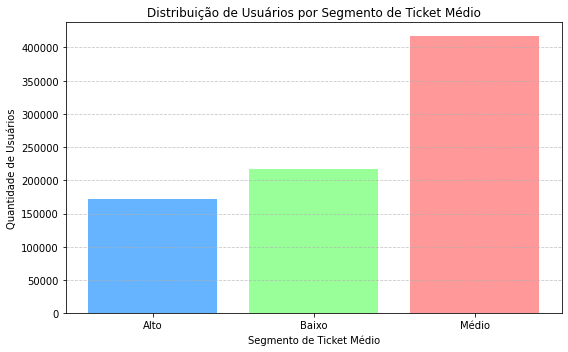

In [0]:
import matplotlib.pyplot as plt

# Converta o DataFrame Spark para Pandas
df_pandas_segmentado_ticket = df_segmentado_ticket_summary.select("segmento_ticket", "qtd_usuarios").toPandas()

# Extraia as colunas como listas
segmentos = df_pandas_segmentado_ticket["segmento_ticket"].tolist()
qtd_usuarios = df_pandas_segmentado_ticket["qtd_usuarios"].tolist()

plt.figure(figsize=(8, 5))
plt.bar(segmentos, qtd_usuarios, color=["#66b3ff", "#99ff99", "#ff9999"])
plt.xlabel("Segmento de Ticket Médio")
plt.ylabel("Quantidade de Usuários")
plt.title("Distribuição de Usuários por Segmento de Ticket Médio")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [0]:
#Horários em que o usuário costuma fazer pedidos com mais frequência.
#Critério: contagem de pedidos por hora do dia
#Segmentos: 
    # Hora em hora
#Racional: identificar com precisão os momentos de maior e menor demanda ao longo do dia. Essa granularidade é essencial para detectar microperíodos de ociosidade, que podem ser mascarados em faixas horárias mais amplas.

df_orders_hr = df_orders_hour_only.groupBy("order_hour_only").count()

##df_orders_hr.orderBy(col("order_hour_only"), ascending=False).show(24)

df_orders_hour_only.groupBy("order_hour_only").agg(
    count("*").alias("total_pedidos"),
    round(sum("order_total_amount") / count("*"), 2).alias("ticket_medio")
).orderBy("order_hour_only").orderBy(col("order_hour_only"), ascending=False).show(24)

+---------------+-------------+------------+
|order_hour_only|total_pedidos|ticket_medio|
+---------------+-------------+------------+
|          23:00|       675773|       49.77|
|          22:00|       682457|       51.07|
|          21:00|       387623|       50.45|
|          20:00|       157230|       48.29|
|          19:00|        61173|       47.05|
|          18:00|        65391|       52.47|
|          17:00|        97455|       49.23|
|          16:00|       161042|       48.42|
|          15:00|       231503|       46.46|
|          14:00|       225930|       43.49|
|          13:00|       102351|       37.31|
|          12:00|        11711|       30.12|
|          11:00|         1639|       31.12|
|          10:00|          520|       33.35|
|          09:00|          196|       68.13|
|          08:00|          261|       41.19|
|          07:00|          871|       42.13|
|          06:00|         2360|       42.13|
|          05:00|         5958|       43.29|
|         

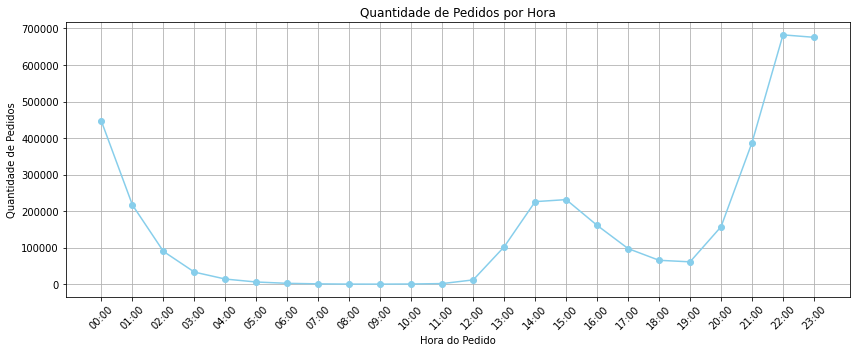

In [0]:
df_orders_hr_pd = df_orders_hr.toPandas()

# Ordena o DataFrame pelo horário
df_orders_hr_pd = df_orders_hr_pd.sort_values(by="order_hour_only")

plt.figure(figsize=(12, 5))
plt.plot(df_orders_hr_pd["order_hour_only"], df_orders_hr_pd["count"], marker='o', color='skyblue')
plt.xlabel("Hora do Pedido")
plt.ylabel("Quantidade de Pedidos")
plt.title("Quantidade de Pedidos por Hora")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [0]:
#Clientes: Inativos vs Ativos:
#Segmentos: 
    #active
    #is_target
#Racional: medir a resposta ao cupom em usuários inativos vs. ativos.

df_joined_orders_consumer_ab.createOrReplaceTempView("orders_status_customer")

status_customer = spark.sql("""
    SELECT 
        active,
        is_target,
        count(distinct customer_id) as total_customers,
        ROUND((SUM(order_total_amount) / 1000),2) AS total_amount_mil,
        COUNT(order_id) AS orders,
        ROUND(SUM(order_total_amount) / COUNT(order_id), 2) AS ticket_medio,
        ROUND((orders / total_customers),2) as avg_orders_by_customers
    FROM orders_status_customer
    GROUP BY 
        active,
        is_target
""")

status_customer.show()

+------+---------+---------------+----------------+-------+------------+-----------------------+
|active|is_target|total_customers|total_amount_mil| orders|ticket_medio|avg_orders_by_customers|
+------+---------+---------------+----------------+-------+------------+-----------------------+
|  true|  control|         359700|        72875.52|1521612|       47.89|                   4.23|
|  true|   target|         444861|       101706.99|2130524|       47.74|                   4.79|
| false|   target|            882|          266.24|   5468|       48.69|                    6.2|
| false|  control|            713|          170.81|   3446|       49.57|                   4.83|
+------+---------+---------------+----------------+-------+------------+-----------------------+



**3. Com base na análise que realizou nas questões 1 e 2, sugira os próximos passos que o iFood deve tomar. Lembre-se que você precisa defender suas sugestões para as lideranças de Negócio, por isso não esqueça de incluir uma previsão de impacto (financeiro ou não) caso o 
iFood siga com a sua recomendação. Fique à vontade para sugerir melhorias no processo/teste e para propor diferentes estratégias de acordo com cada segmento de usuário.** 

Escalar a campanha de cupons com segmentação inteligente. Justificativa: A campanha gerou lucro e aumento significativo de pedidos.

Próximo passo: Aplicar segmentação comportamental, como:

- Frequência de pedidos
- Horário do pedido
- Histórico de tíquete médio
- Clientes: Inativos vs Ativos
- Região (cidades com menor penetração)

Previsão de impacto: A segmentação pode aumentar o ROI em até 20%, reduzindo cupons desperdiçados em clientes que já comprariam sem incentivo.

 **Situação Atual (sem segmentação)** 
 
- Total de cupons usados: 260.000
- Custo total da campanha: R$2.600.000
- Lucro bruto gerado (comissões - custo): R$2.144.012,60
- ROI atual: (2.144.012,60 / 2.600.000) = 82,5%

**Novo cenário (com segmentação)**

Vamos supor que 20% dos cupons (52.000 cupons) poderiam ter sido evitados com uma segmentação mais eficiente (dados históricos, frequência de pedidos, tíquete médio etc.).

- Cupons utilizados: 208.000
- Novo custo da campanha: 208.000 × R$10 = R$2.080.000
- Lucro bruto mantido (assumindo que só removemos cupons ineficientes): continua R$2.144.012,60
- Novo ROI: (2.144.012,60 / 2.080.000) = 103%

Aumento no ROI:

- Aumento percentual = ((103 - 82,5) / 82,5) * 100 = 24,8%

**Conclusão**

Se o iFood conseguir evitar apenas 20% dos cupons ineficientes, o ROI da campanha pode aumentar de 82,5% para 103%, ou seja, um ganho de quase 25% em eficiência — o que justifica a previsão conservadora de “até 20%” de aumento no ROI.

**Incentivo Direcionado em Horários de Baixa Demanda**

Com base na análise dos resultados da campanha atual e na identificação de faixas horárias com ociosidade, recomendamos a aplicação de cupons de valor ampliado (ex.: R$15) restritos a horários de menor volume de pedidos, como o período entre 17h e 19h.

Demanda total (soma dos pedidos) = ~6,700,000

Horários com capacidade ociosa:
- 17h: 97.455
- 18h: 65.391
- 19h: 61.173
- Total: ~224 mil pedidos

Horário de jantar (alta demanda):
- 20h: 157.230
- 21h: 387.623
- 22h: 682.457
- 23h: 675.773
- Total: ~1.9 milhão de pedidos

**Análise: Por que focar no horário 17h–19h**

Entre 17h e 19h, o volume de pedidos ainda é baixo 3,3% da demanda, mas o ticket médio é alto (acima de R$47), comparável ao horário de pico.

Ou seja: existe poder de compra disponível, mas há falta de estímulo comportamental para antecipar o consumo.

A partir das 20h a demanda aumenta muito — isso pressiona a operação e pode comprometer a experiência do usuário e a capacidade dos entregadores.

Benefícios da Ação (do ponto de vista operacional e de experiência do cliente)

- Melhora no NPS: Com menor volume de pedidos nesse horário, é possível garantir entregas mais rápidas e com menor taxa de erro.

- Redução da sobrecarga nos horários de pico (20h–23h), melhorando a performance logística e evitando atrasos.

- Melhor uso da capacidade existente, já que toda a infraestrutura (restaurantes, entregadores, sistema) já está ativa, mas subutilizada.

- Criação de um novo hábito de consumo em um horário estratégico.

Limitação Financeira

- A simulação indica que a ação não é financeiramente viável por si só, já que o valor dos cupons (R$15) aplicados a todos os pedidos entre 17h–19h gera prejuízo se não houver um aumento real de novos pedidos.

- Ou seja, se os clientes apenas anteciparem seus pedidos, o iFood perde margem, já que pagará o cupom mesmo em pedidos que já aconteceriam de qualquer forma.

Solução Estratégica: Parceria com Restaurantes
A campanha pode ser viabilizada em parceria com os restaurantes, que também se beneficiam:

- Restaurantes têm mais tempo para produção e menos pressão operacional no pico.

- Melhora a experiência do cliente (menor tempo de espera = mais avaliações positivas).

- Possibilidade de divisão do custo do cupom entre iFood e restaurante.

- Exemplo: iFood oferece R$10 e o restaurante concede mais R$5, totalizando o incentivo de R$15.

Conclusão Estratégica

- Embora a campanha não seja financeiramente viável isoladamente, ela pode trazer ganhos operacionais e de experiência do cliente, que têm impacto indireto no negócio (retenção, NPS, eficiência de entrega).

- Ao combinar a ação com parcerias estratégicas com restaurantes e foco em pedidos realmente incrementais, ela pode ser sustentável e benéfica no médio prazo.

**Estratégia para Usuários Novatos**

- Comportamento observado: Realizaram apenas um pedido e representam o maior risco de churn.

Recomendação:

- Oferecer o cupom de R$10 para esse grupo, válido em pedidos a partir de R$60 (como já definido)

Justificativa:

- A condição de uso (mínimo de R$60) garante aumento no ticket médio e contribui para diluir o valor do cupom no pedido.

Calculo do Impacto

- Usuários alvo: 182.521

- Taxa de conversão estimada com cupom: 20% → 36.504 usuários

- Valor médio do pedido com cupom: R$65

- Receita bruta estimada: R$65 x 36.504 = R$2.372.760

- Receita líquida do iFood (16,4%): R$2.372.760 x 0.164 = R$389.121

- Custo com cupons: - 36.504 x R$10 = R$365.040

- Lucro líquido estimado: R$389.121 – R$365.040 = R$24.081

Conclusão Estratégica: 

- Mesmo com uma margem pequena, o real ganho está na retenção desses clientes, que podem migrar para o segmento Moderado.